# Analysis for gRNA

gRNA structures for display
* [Unmodifed gRNA](#unmodified_gRNA)

MDtrajectory Analysis
* [gRNA handle](#gRNA_handle)
* [gRNA nexus](#gRNA_nexus)
* [gRNA terminator loop](#gRNA_terminator)

In [ ]:
# General tools
import numpy as np
import scipy as sp
import pandas as pd

import parmed.gromacs
import nglview
import mdtraj

import matplotlib.pyplot as plt

import os
import glob
from mdtools import *

## Recenter and strip waters from pdb files

In [2]:
# Recenter the pdb and get waters
def prep_xtc(folder):
    topo = folder+'prod.tpr'
    traj = folder+'prod.xtc'
    traj2 = folder+'prod_nowater.xtc'

    gromacs_recenter_structure(traj, topo, traj2)
    gromacs_convert_to_PDB(traj2, topo, traj2)
    # export pdb for only the last frame. Use this as the topology file for mdtraj
    gromacs_convert_to_PDB(traj[:-4]+'.gro', topo, traj2[:-4]+'.pdb', 'non-Water')
    subprocess.call('rm '+folder+'#*', shell = True)

In [18]:
Recenter = False
if Recenter:
    # Recenter the trajectory file using gromacs. Strip out waters and create a topology pdb
    files = glob.glob('./system*/prod/')
    for f in files:
        prep_xtc(f)

    # Move centered files to data folder
    pdb_files = glob.glob('./system*/prod/*nowater.pdb')
    xtc_files = glob.glob('./system*/prod/*nowater.xtc')

    for f in pdb_files:
        fname = f.split('/')[1].split('system_')[1]
        cmd = 'mv '+f+' ./data/'+fname+'.pdb'
        print(cmd)
        subprocess.call('mv '+f+' ./data/'+fname+'.pdb', shell = True)

    for f in xtc_files:
        fname = f.split('/')[1].split('system_')[1]
        cmd = 'mv '+f+' ./data/'+fname+'.xtc'
        print(cmd)
        subprocess.call('mv '+f+' ./data/'+fname+'.xtc', shell = True)

 <a id='unmodified_gRNA'></a>
 ## Unmodified gRNA

In [3]:
# Colors for dCas9
dCas9_domainN = [1,60,94,180,308,718,775,909,1099,1363]
dCas9_domainColor = ['blue','green','firebrick','red','salmon','cyan','purple','royalblue','orange']
gRNA_domainN = [1,10,23,26,40,53,59,62,67,98]
gRNA_domainColor = ['red','blue','white','blue','orange','purple','green','white','green']

In [4]:
traj = mdtraj.load('./data/gRNA.xtc', top = './data/gRNA.pdb')
df = mdtraj_get_HBondList(traj[0])
df[(df['donor chain']==1)+(df['acceptor chain']==1)]

Computing frame  0


/home/zchen/.local/lib64/python3.6/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


,frame,donor chain,donor resnum,donor,donor position (nm),acceptor chain,acceptor resnum,acceptor,acceptor position (nm),length (nm)
31,0,0,57,GLU57-H,"[11.244, 12.082001, 5.6660004]",1,55,RA55-O1P,"[11.266001, 12.258, 5.721]",0.185701
32,0,0,59,ALA59-H,"[10.915001, 12.181001, 5.032]",1,3,RA3-O1P,"[11.037001, 12.149, 4.8970003]",0.184751
33,0,0,63,ARG63-HH11,"[10.478001, 12.360001, 4.623]",1,4,RG4-O2P,"[10.644, 12.474001, 4.6150002]",0.201534
38,0,0,66,ARG66-HE,"[10.258, 13.032001, 4.8050003]",1,5,RC5-O1P,"[10.243, 13.122001, 4.635]",0.192938
39,0,0,66,ARG66-HH21,"[10.35, 12.833, 4.743]",1,5,RC5-O2P,"[10.265, 12.8810005, 4.5870004]",0.184024
42,0,0,69,ARG69-HH12,"[10.022, 12.987, 5.5990005]",1,53,RA53-O2P,"[10.223001, 13.000001, 5.5530005]",0.206606
43,0,0,69,ARG69-HH21,"[10.030001, 13.203001, 5.335]",1,52,RG52-O2P,"[10.155001, 13.335001, 5.255]",0.198618
44,0,0,69,ARG69-HH22,"[10.129001, 13.102, 5.446]",1,53,RA53-O2P,"[10.223001, 13.000001, 5.5530005]",0.175182
45,0,0,70,ARG70-HE,"[9.838, 13.440001, 4.795]",1,51,RC51-O2P,"[9.899, 13.597001, 4.861]",0.180904
46,0,0,70,ARG70-HH11,"[9.889001, 13.160001, 4.5880003]",1,6,RG6-O2P,"[9.812, 13.128, 4.426]",0.182201


In [5]:
view = nglview.show_mdtraj(traj, gui = True)
view.clear_representations()
# draw only hbonds between rna and protein
drawHbond(view, df[(df['donor chain']==1)+(df['acceptor chain']==1)])
color_structure(view[0], 'cartoon', 'protein', dCas9_domainN, dCas9_domainColor)
color_structure(view[0], 'cartoon', 'nucleic', gRNA_domainN, gRNA_domainColor)
view[0].add_representation('licorice','nucleic')
view.parameters = {'backgroundColor': 'black'}
view

NGLWidget(count=101)

 <a id='gRNA_handle'></a>
## Trajectory Analysis for dCas9 handle

In [45]:
files = ['./data/gRNA',
         './data/gRNA_handle_del1',
         './data/gRNA_handle_del2']
traj = []
for f in files:
    print('Loading file ', f)
    traj.append(mdtraj.load(f+'.xtc', top = f+'.pdb'))

Loading file  ./data/gRNA
Loading file  ./data/gRNA_handle_del1
Loading file  ./data/gRNA_handle_del2


In [46]:
# Residue indices for dCas9 and the gRNA
loc = [[126, 17, 34],
       [126, 17, 32],
       [126, 17, 22]]

# Get distance info
out = []
for i in range(0,len(traj)):
    idx = loc[i]
    chunk = traj[i]
    dCas9 = list(chunk.top.chains)[0]
    RNA = list(chunk.top.chains)[1]

    A = list(dCas9.residues)[idx[0]-4]
    B1 = list(RNA.residues)[idx[1]-2]
    B2 = list(RNA.residues)[idx[2]-2]
    print(A, B1, B2)

    # Compute centroid of the residues for each frame
    data = mdtraj.compute_contacts(chunk, [[A.index,B1.index],
                                          [A.index,B2.index],
                                          [B1.index,B2.index]])
    out.append(data)

VAL126 RG17 RU34
VAL126 RG17 RC32
VAL126 RG17 RU22


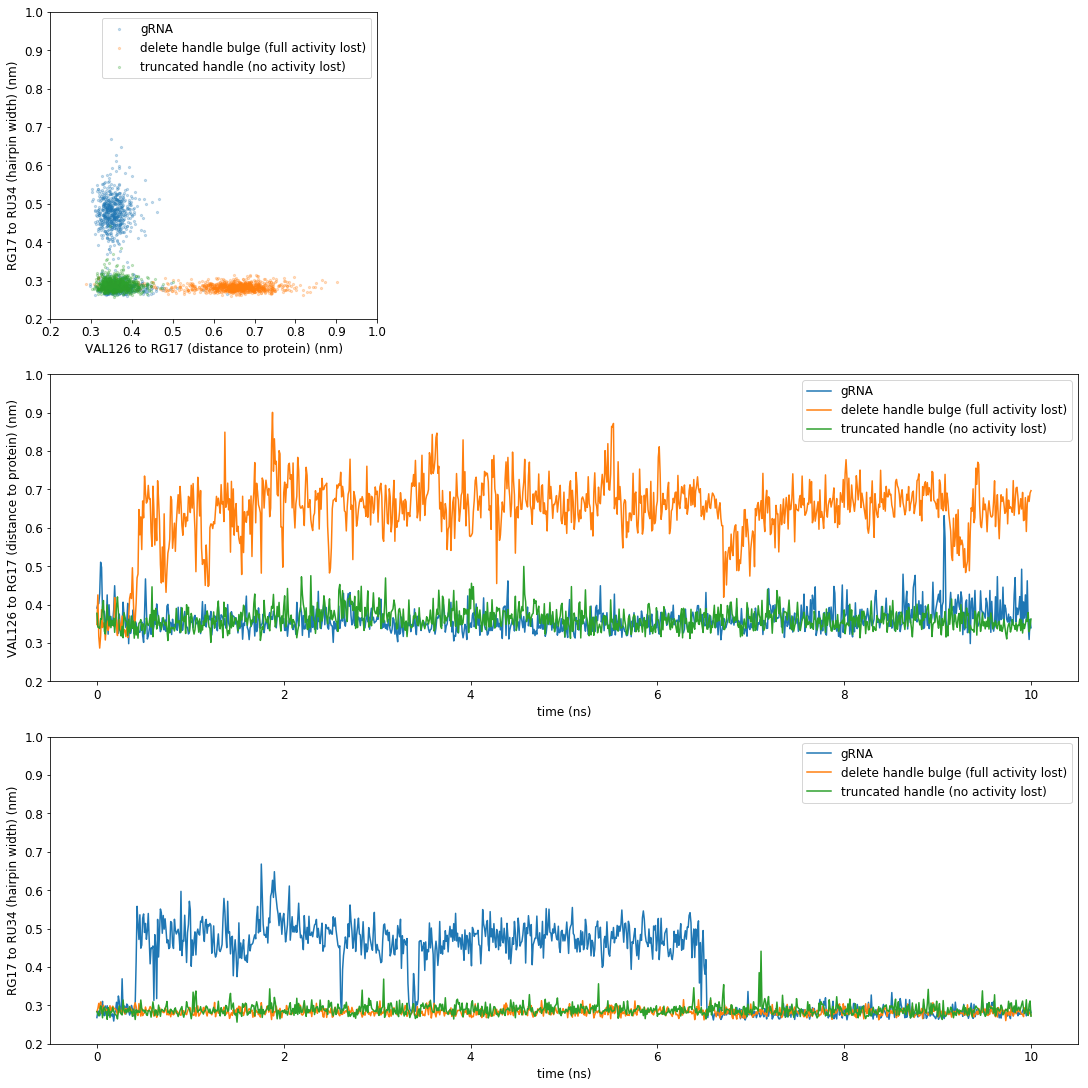

In [47]:
# Defines the figure
fig = plt.figure(1, constrained_layout=True, figsize=(15,15))
plt.rcParams.update({'font.size': 12})
# Defines the sub windows of the figure
gs = fig.add_gridspec(3, 3)

labels = ['gRNA', 'delete handle bulge (full activity lost)', 'truncated handle (no activity lost)']
count = 0
fig.add_subplot(gs[0,0])
for i in [0,1,2]:
    # Define current subplot
    y = np.array(out[i][0])
    plt.scatter(y[:,0], y[:,2], label = labels[count], s = 5, alpha=0.25)
    count = count+1
    
plt.xlabel('VAL126 to RG17 (distance to protein) (nm)')
plt.ylabel('RG17 to RU34 (hairpin width) (nm)')
plt.xlim([0.2, 1.0])
plt.ylim([0.2, 1.0])
plt.legend()

fig.add_subplot(gs[2, 0:3])
count = 0
for i in [0,1,2]:
    # Define current subplot
    y = np.array(out[i][0])
    t = np.arange(0,len(y))*.01
    plt.plot(t, y[:,2], label = labels[count])
    count = count+1
    
plt.xlabel('time (ns)')
plt.ylabel('RG17 to RU34 (hairpin width) (nm)')
plt.ylim([0.2, 1.0])
plt.legend()

fig.add_subplot(gs[1, 0:3])
count = 0
for i in [0,1,2]:
    # Define current subplot
    y = np.array(out[i][0])
    t = np.arange(0,len(y))*.01
    plt.plot(t, y[:,0], label = labels[count])
    count = count+1

plt.xlabel('time (ns)')
plt.ylabel('VAL126 to RG17 (distance to protein) (nm)')
plt.ylim([0.2, 1.0])
plt.legend()



## Unmodified gRNA

In [48]:
i = 0
view = nglview.show_mdtraj(traj[i], gui=True)
view.clear_representations()
color_structure(view, 'cartoon', 'protein', dCas9_domainN, dCas9_domainColor)

gRNA_domainN2 = [[1,10,23,26,40,53,59,62,67,98],
                 [1,10,23,26,40-2,53-2,59-2,62-2,67-2,98-2],
                 [1,10,23-6,26-4,40-12,53-12,59-12,62-12,67-12,98-12]]

color_structure(view, 'cartoon', 'nucleic', gRNA_domainN2[i], gRNA_domainColor)

view.add_representation('licorice','nucleic')
view.parameters = {'backgroundColor': 'black'}
view

NGLWidget(count=1001)

## Deleted handle bulge

In [49]:
i = 1
view = nglview.show_mdtraj(traj[i], gui=True)
view.clear_representations()
color_structure(view, 'cartoon', 'protein', dCas9_domainN, dCas9_domainColor)

gRNA_domainN2 = [[1,10,23,26,40,53,59,62,67,98],
                 [1,10,23,26,40-2,53-2,59-2,62-2,67-2,98-2],
                 [1,10,23-6,26-4,40-12,53-12,59-12,62-12,67-12,98-12]]

color_structure(view, 'cartoon', 'nucleic', gRNA_domainN2[i], gRNA_domainColor)

view.add_representation('licorice','nucleic')
view.parameters = {'backgroundColor': 'black'}
view

NGLWidget(count=1001)

## Truncated dCas9 handle

In [50]:
i = 2
view = nglview.show_mdtraj(traj[i], gui=True)
view.clear_representations()
color_structure(view, 'cartoon', 'protein', dCas9_domainN, dCas9_domainColor)

gRNA_domainN2 = [[1,10,23,26,40,53,59,62,67,98],
                 [1,10,23,26,40-2,53-2,59-2,62-2,67-2,98-2],
                 [1,10,23-6,26-4,40-12,53-12,59-12,62-12,67-12,98-12]]

color_structure(view, 'cartoon', 'nucleic', gRNA_domainN2[i], gRNA_domainColor)

view.add_representation('licorice','nucleic')
view.parameters = {'backgroundColor': 'black'}
view

NGLWidget(count=1001)

 <a id='gRNA_nexus'></a>
## Trajectory Analysis for nexus domain

In [51]:
files = ['./data/gRNA',
         './data/gRNA_nexus_del1',
         './data/gRNA_nexus_del2',
         './data/gRNA_nexus_mut1',
         './data/gRNA_nexus_xt1']
traj = []
for f in files:
    print('Loading file ', f)
    traj.append(mdtraj.load(f+'.xtc', top = f+'.pdb'))

Loading file  ./data/gRNA
Loading file  ./data/gRNA_nexus_del1
Loading file  ./data/gRNA_nexus_del2
Loading file  ./data/gRNA_nexus_mut1
Loading file  ./data/gRNA_nexus_xt1


In [52]:
# Residue indices for dCas9 and the gRNA
loc = [[70, 50, 44, 49],
       [70, 50, 44, 49],
       [70, 50, 44, 49-1],
       [70, 50, 44, 49],
       [70, 50+1, 44+1, 49+1]]

# Get distance info
out = []
for i in range(0,len(traj)):
    idx = loc[i]
    chunk = traj[i]
    dCas9 = list(chunk.top.chains)[0]
    RNA = list(chunk.top.chains)[1]

    A = list(dCas9.residues)[idx[0]-4]
    B1 = list(RNA.residues)[idx[1]-2]
    B2 = list(RNA.residues)[idx[2]-2]
    B3 = list(RNA.residues)[idx[3]-2]
    print(A, B1, B2, B3)

    # Compute centroid of the residues for each frame
    data = mdtraj.compute_contacts(chunk, [[A.index,B1.index],
                                          [A.index,B2.index],
                                          [A.index,B3.index],
                                          [B1.index,B2.index]])
    out.append(data)

ARG70 RC50 RG44 RU49
ARG70 RC50 RC44 RU49
ARG70 RC50 RG44 RU48
ARG70 RG50 RC44 RU49
ARG70 RC51 RG45 RU50


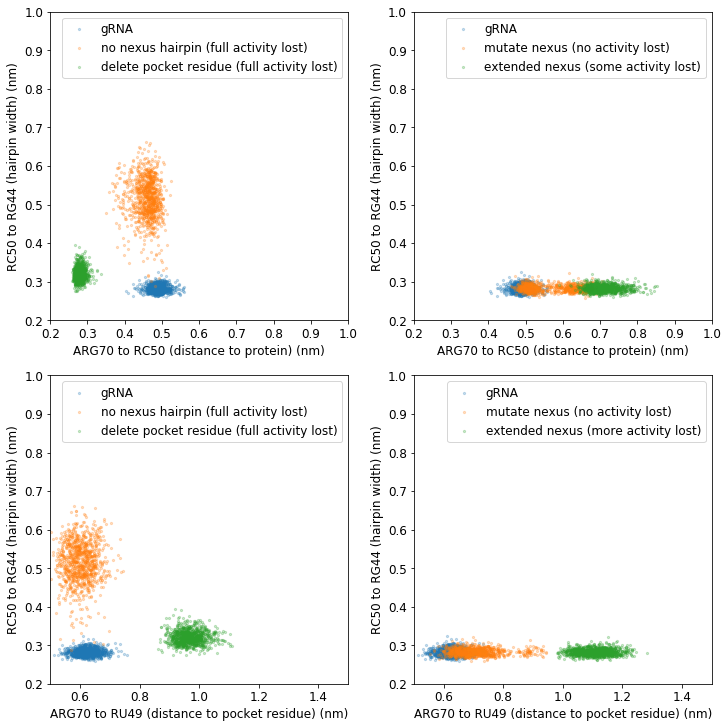

In [53]:
# Defines the figure
fig = plt.figure(1, constrained_layout=True, figsize=(10,10))
plt.rcParams.update({'font.size': 12})
# Defines the sub windows of the figure
gs = fig.add_gridspec(2, 2)

labels = ['gRNA', 'no nexus hairpin (full activity lost)', 'delete pocket residue (full activity lost)']
count = 0
fig.add_subplot(gs[0,0])
for i in [0,1,2]:
    # Define current subplot
    y = np.array(out[i][0])
    plt.scatter(y[:,0], y[:,3], label = labels[count], s = 5, alpha = 0.25)
    count = count+1

plt.xlabel('ARG70 to RC50 (distance to protein) (nm)')
plt.ylabel('RC50 to RG44 (hairpin width) (nm)')
plt.xlim([0.2, 1.0])
plt.ylim([0.2, 1.0])
plt.legend()

labels = ['gRNA', 'mutate nexus (no activity lost)', 'extended nexus (some activity lost)']
count = 0
fig.add_subplot(gs[0,1])
for i in [0,3,4]:
    # Define current subplot
    y = np.array(out[i][0])
    plt.scatter(y[:,0], y[:,3], label = labels[count], s = 5, alpha = 0.25)
    count = count+1

plt.xlabel('ARG70 to RC50 (distance to protein) (nm)')
plt.ylabel('RC50 to RG44 (hairpin width) (nm)')
plt.xlim([0.2, 1.0])
plt.ylim([0.2, 1.0])
plt.legend()

labels = ['gRNA', 'no nexus hairpin (full activity lost)', 'delete pocket residue (full activity lost)']
count = 0
fig.add_subplot(gs[1,0])
for i in [0,1,2]:
    # Define current subplot
    y = np.array(out[i][0])
    plt.scatter(y[:,2], y[:,3], label = labels[count], s = 5, alpha = 0.25)
    count = count+1

plt.xlabel('ARG70 to RU49 (distance to pocket residue) (nm)')
plt.ylabel('RC50 to RG44 (hairpin width) (nm)')
plt.xlim([0.5, 1.5])
plt.ylim([0.2, 1.0])
plt.legend()

labels = ['gRNA', 'mutate nexus (no activity lost)', 'extended nexus (more activity lost)']
count = 0
fig.add_subplot(gs[1,1])
for i in [0,3,4]:
    # Define current subplot
    y = np.array(out[i][0])
    plt.scatter(y[:,2], y[:,3], label = labels[count], s = 5, alpha = 0.25)
    count = count+1

plt.xlabel('ARG70 to RU49 (distance to pocket residue) (nm)')
plt.ylabel('RC50 to RG44 (hairpin width) (nm)')
plt.xlim([0.5, 1.5])
plt.ylim([0.2, 1.0])
plt.legend()

## Unmodified gRNA

In [54]:
i = 0
view = nglview.show_mdtraj(traj[i], gui=True)
view.clear_representations()
color_structure(view, 'cartoon', 'protein', dCas9_domainN, dCas9_domainColor)

gRNA_domainN2 = [[1,10,23,26,40,53,59,62,67,98],
                 [1,10,23,26,40,53,59,62,67,98],
                 [1,10,23,26,40,53-1,59-1,62-1,67-1,98-1],
                 [1,10,23,26,40,53,59,62,67,98],
                 [1,10,23,26,40,53+2,59+2,62+2,67+2,98+2]]

color_structure(view, 'cartoon', 'nucleic', gRNA_domainN2[i], gRNA_domainColor)

view.add_representation('licorice','nucleic')
view.parameters = {'backgroundColor': 'black'}
view

NGLWidget(count=1001)

## no Nexus hairpin

In [55]:
i = 1
view = nglview.show_mdtraj(traj[i], gui=True)
view.clear_representations()
color_structure(view, 'cartoon', 'protein', dCas9_domainN, dCas9_domainColor)

gRNA_domainN2 = [[1,10,23,26,40,53,59,62,67,98],
                 [1,10,23,26,40,53,59,62,67,98],
                 [1,10,23,26,40,53-1,59-1,62-1,67-1,98-1],
                 [1,10,23,26,40,53,59,62,67,98],
                 [1,10,23,26,40,53+2,59+2,62+2,67+2,98+2]]

color_structure(view, 'cartoon', 'nucleic', gRNA_domainN2[i], gRNA_domainColor)

view.add_representation('licorice','nucleic')
view.parameters = {'backgroundColor': 'black'}
view

NGLWidget(count=1001)

## Deleted pocket residue

In [56]:
i = 2
view = nglview.show_mdtraj(traj[i], gui=True)
view.clear_representations()
color_structure(view, 'cartoon', 'protein', dCas9_domainN, dCas9_domainColor)

gRNA_domainN2 = [[1,10,23,26,40,53,59,62,67,98],
                 [1,10,23,26,40,53,59,62,67,98],
                 [1,10,23,26,40,53-1,59-1,62-1,67-1,98-1],
                 [1,10,23,26,40,53,59,62,67,98],
                 [1,10,23,26,40,53+2,59+2,62+2,67+2,98+2]]

color_structure(view, 'cartoon', 'nucleic', gRNA_domainN2[i], gRNA_domainColor)

view.add_representation('licorice','nucleic')
view.parameters = {'backgroundColor': 'black'}
view

NGLWidget(count=1001)

## No activity loss mutation

In [57]:
i = 3
view = nglview.show_mdtraj(traj[i], gui=True)
view.clear_representations()
color_structure(view, 'cartoon', 'protein', dCas9_domainN, dCas9_domainColor)

gRNA_domainN2 = [[1,10,23,26,40,53,59,62,67,98],
                 [1,10,23,26,40,53,59,62,67,98],
                 [1,10,23,26,40,53-1,59-1,62-1,67-1,98-1],
                 [1,10,23,26,40,53,59,62,67,98],
                 [1,10,23,26,40,53+2,59+2,62+2,67+2,98+2]]

color_structure(view, 'cartoon', 'nucleic', gRNA_domainN2[i], gRNA_domainColor)

view.add_representation('licorice','nucleic')
view.parameters = {'backgroundColor': 'black'}
view

NGLWidget(count=1001)

## Extended Nexus hairpin

In [58]:
i = 4
view = nglview.show_mdtraj(traj[i], gui=True)
view.clear_representations()
color_structure(view, 'cartoon', 'protein', dCas9_domainN, dCas9_domainColor)

gRNA_domainN2 = [[1,10,23,26,40,53,59,62,67,98],
                 [1,10,23,26,40,53,59,62,67,98],
                 [1,10,23,26,40,53-1,59-1,62-1,67-1,98-1],
                 [1,10,23,26,40,53,59,62,67,98],
                 [1,10,23,26,40,53+2,59+2,62+2,67+2,98+2]]

color_structure(view, 'cartoon', 'nucleic', gRNA_domainN2[i], gRNA_domainColor)

view.add_representation('licorice','nucleic')
view.parameters = {'backgroundColor': 'black'}
view

NGLWidget(count=1001)

 <a id='gRNA_terminator'></a>
## Trajectory Analysis for Terminator loop

In [33]:
files = ['./data/gRNA',
         './data/gRNA_ws',
         './data/gRNA_ns',
         './data/cgI',
         './data/cgIws',
         './data/cgIns']

traj = []
for f in files:
    print('Loading file ', f)
    traj.append(mdtraj.load(f+'.xtc', top = f+'.pdb'))

Loading file  ./data/gRNA
Loading file  ./data/gRNA_ws
Loading file  ./data/gRNA_ns
Loading file  ./data/cgI
Loading file  ./data/cgIws
Loading file  ./data/cgIns


In [34]:
# Residue indices for dCas9 and the gRNA
idx = [1357, 58, -2]

# Get all distances
out = []
for i in range(0,len(traj)):
    chunk = traj[i]
    dCas9 = list(chunk.top.chains)[0]
    RNA = list(chunk.top.chains)[1]

    A = list(dCas9.residues)[idx[0]-4]
    B1 = list(RNA.residues)[idx[1]-2]
    B2 = list(RNA.residues)[idx[2]]
    print(A, B1, B2)

    # Compute centroid of the residues for each frame
    data = mdtraj.compute_contacts(chunk, [[A.index,B1.index],
                                          [A.index,B2.index],
                                          [B1.index,B2.index]])
    out.append(data)

GLU1357 RA58 RG71
GLU1357 RA58 RG71
GLU1357 RA58 RG71
GLU1357 RA58 RG97
GLU1357 RA58 RG97
GLU1357 RA58 RG97


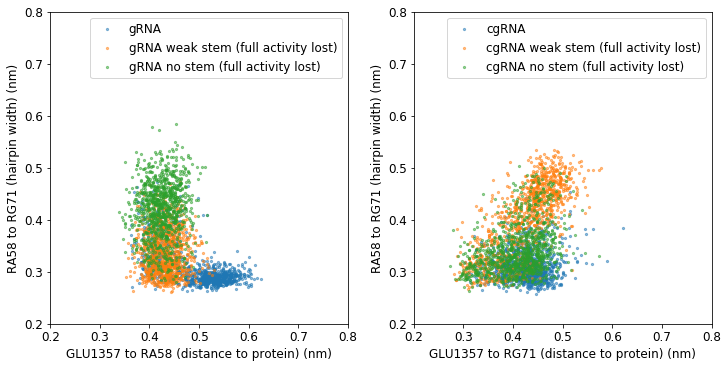

In [35]:
# Defines the figure
fig = plt.figure(1, constrained_layout=True, figsize=(10,5))
plt.rcParams.update({'font.size': 12})
# Defines the sub windows of the figure
gs = fig.add_gridspec(1, 2)

same_time = False
labels = ['gRNA', 'gRNA weak stem (full activity lost)', 'gRNA no stem (full activity lost)']
fig.add_subplot(gs[0,0])
for i in range(0,3):
    # Define current subplot
    y = np.array(out[i][0])
    plt.scatter(y[:,0], y[:,2], label = labels[i], s = 5, alpha = 0.5)

plt.xlabel('GLU1357 to RA58 (distance to protein) (nm)')
plt.ylabel('RA58 to RG71 (hairpin width) (nm)')
plt.xlim([0.2, 0.8])
plt.ylim([0.2, 0.8])
plt.legend()

labels = ['cgRNA', 'cgRNA weak stem (full activity lost)', 'cgRNA no stem (full activity lost)']
fig.add_subplot(gs[0,1])
for i in range(3,6):
    # Define current subplot
    y = np.array(out[i][0])
    plt.scatter(y[:,1], y[:,2], label = labels[i-3], s = 5, alpha = 0.5)

plt.xlabel('GLU1357 to RG71 (distance to protein) (nm)')
plt.ylabel('RA58 to RG71 (hairpin width) (nm)')
plt.xlim([0.2, 0.8])
plt.ylim([0.2, 0.8])
plt.legend()

/home/zchen/.local/lib64/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


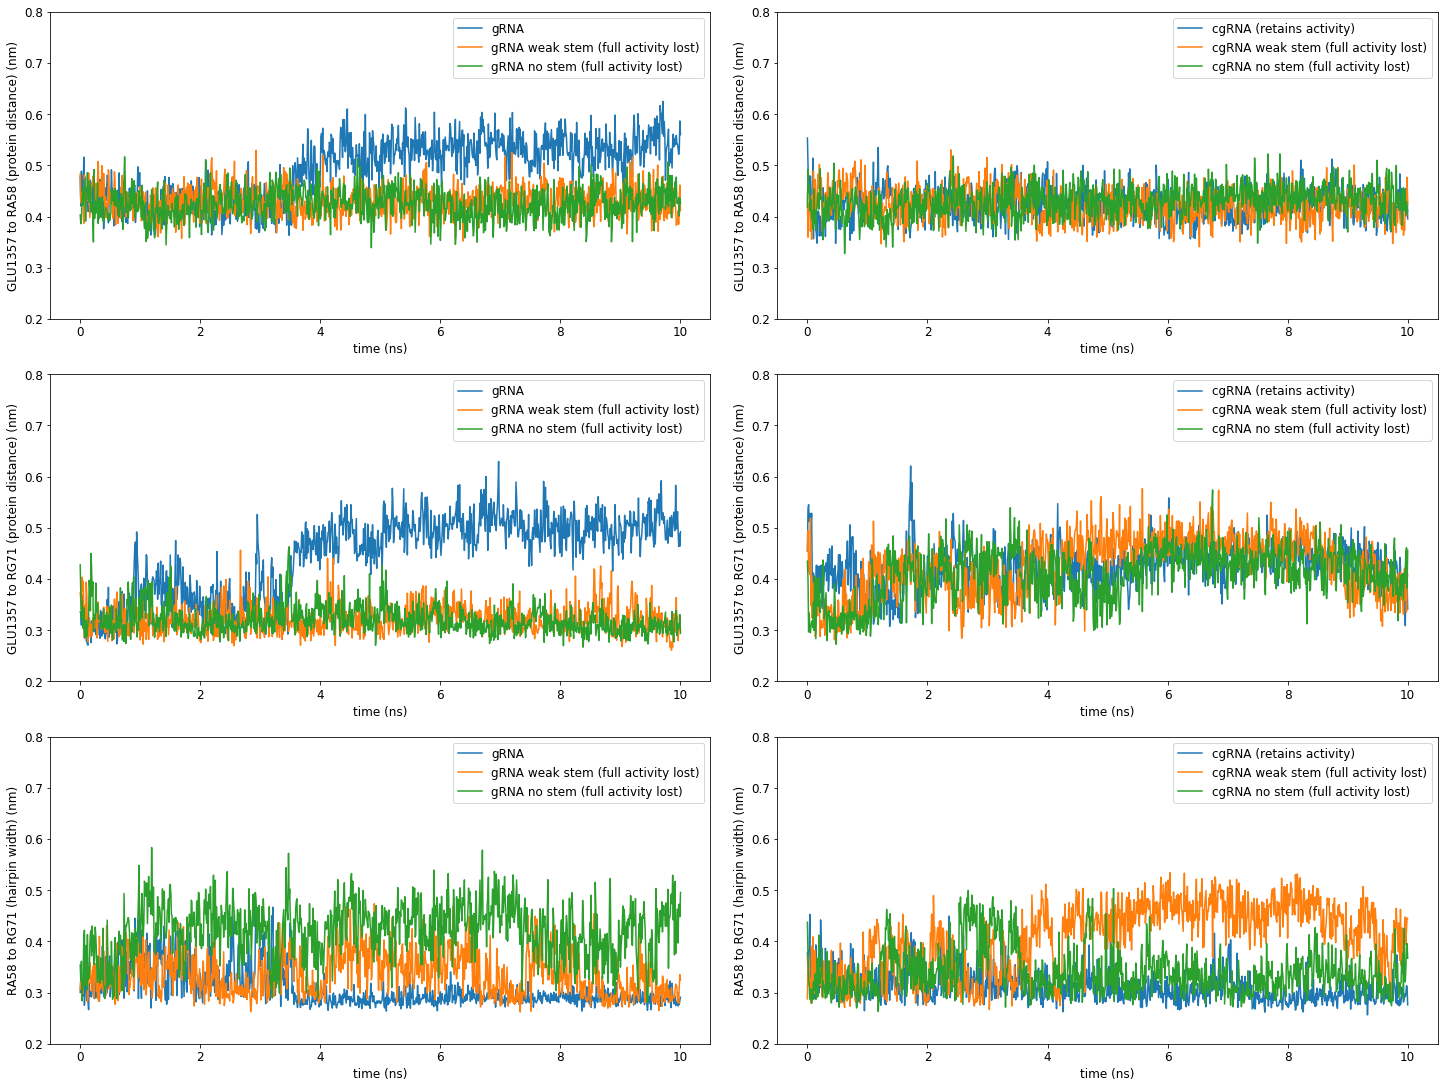

In [36]:
# Defines the figure
fig = plt.figure(2, constrained_layout=True, figsize=(20,15))
plt.rcParams.update({'font.size': 12})
# Defines the sub windows of the figure
gs = fig.add_gridspec(3, 2)

L1 = ['gRNA', 'gRNA weak stem (full activity lost)', 'gRNA no stem (full activity lost)',
      'cgRNA (retains activity)', 'cgRNA weak stem (full activity lost)', 'cgRNA no stem (full activity lost)']
Ly = ['GLU1357 to RA58 (protein distance) (nm)',
      'GLU1357 to RG71 (protein distance) (nm)',
      'RA58 to RG71 (hairpin width) (nm)']

for j in range(0,3):
    for i in [0,1,2]:
        fig.add_subplot(gs[j,0])
        # Define current subplot
        y = np.array(out[i][0])
        x = np.arange(0,len(y))*0.01    
        plt.plot(x, y[:,j], label = L1[i])
    
    plt.xlabel('time (ns)')
    plt.ylabel(Ly[j])
    plt.ylim([0.2, 0.8])
    plt.legend()
    
    for i in [3,4,5]:
        fig.add_subplot(gs[j,1])
        # Define current subplot
        y = np.array(out[i][0])
        x = np.arange(0,len(y))*0.01    
        plt.plot(x, y[:,j], label = L1[i])

    plt.xlabel('time (ns)')
    plt.ylabel(Ly[j])
    plt.ylim([0.2, 0.8])
    plt.legend()


## Unmodified gRNA

In [37]:
view = nglview.show_mdtraj(traj[0], gui=True)
view.clear_representations()
color_structure(view, 'cartoon', 'protein', dCas9_domainN, dCas9_domainColor)
color_structure(view, 'cartoon', 'nucleic', gRNA_domainN, gRNA_domainColor)

view.add_representation('licorice','nucleic')
view.parameters = {'backgroundColor': 'black'}
view

NGLWidget(count=1001)

## gRNA weak stem

In [38]:
view = nglview.show_mdtraj(traj[1], gui=True)
view.clear_representations()
color_structure(view, 'cartoon', 'protein', dCas9_domainN, dCas9_domainColor)
color_structure(view, 'cartoon', 'nucleic', gRNA_domainN, gRNA_domainColor)

view.add_representation('licorice','nucleic')
view.parameters = {'backgroundColor': 'black'}
view

NGLWidget(count=1001)

## gRNA no stem

In [39]:
view = nglview.show_mdtraj(traj[2], gui=True)
view.clear_representations()
color_structure(view, 'cartoon', 'protein', dCas9_domainN, dCas9_domainColor)
color_structure(view, 'cartoon', 'nucleic', gRNA_domainN, gRNA_domainColor)

view.add_representation('licorice','nucleic')
view.parameters = {'backgroundColor': 'black'}
view

NGLWidget(count=1001)

## cgRNA

In [40]:
view = nglview.show_mdtraj(traj[3], gui=True)
view.clear_representations()
color_structure(view, 'cartoon', 'protein', dCas9_domainN, dCas9_domainColor)

gRNA_domainN2 = [1,10,23,26,40,53,59,62,93,98]
color_structure(view, 'cartoon', 'nucleic', gRNA_domainN2, gRNA_domainColor)

view.add_representation('licorice','nucleic')
view.parameters = {'backgroundColor': 'black'}
view

NGLWidget(count=1001)

## cgRNA weak stem

In [41]:
view = nglview.show_mdtraj(traj[4], gui=True)
view.clear_representations()
color_structure(view, 'cartoon', 'protein', dCas9_domainN, dCas9_domainColor)

gRNA_domainN2 = [1,10,23,26,40,53,59,62,93,98]
color_structure(view, 'cartoon', 'nucleic', gRNA_domainN2, gRNA_domainColor)

view.add_representation('licorice','nucleic')
view.parameters = {'backgroundColor': 'black'}
view

NGLWidget(count=1001)

## cgRNA no stem

In [42]:
view = nglview.show_mdtraj(traj[4], gui=True)
view.clear_representations()
color_structure(view, 'cartoon', 'protein', dCas9_domainN, dCas9_domainColor)

gRNA_domainN2 = [1,10,23,26,40,53,59,62,93,98]
color_structure(view, 'cartoon', 'nucleic', gRNA_domainN2, gRNA_domainColor)

view.add_representation('licorice','nucleic')
view.parameters = {'backgroundColor': 'black'}
view

NGLWidget(count=1001)

## Apo dCas9

In [43]:
view = nglview.show_file('./structures/dCas9_apo.pdb', gui=True)
view.clear_representations()
color_structure(view, 'cartoon', 'protein', dCas9_domainN, dCas9_domainColor)
view.add_representation('cartoon','nucleic',color = 'blue')

view.add_representation('licorice','nucleic')
view.parameters = {'backgroundColor': 'black'}
view

NGLWidget()